In [62]:
# MY1. PYTHON ---  PROJECT 3  ----  ANZHELA  CHANYSHEVA

# For my proect I chose "Ambient Air Quality Database" from the World Health
# Organization (WHO). The dataset includes air pollution measurements for
# different years and locations, and compiles data on ground measurements of
# annual mean concentrations of nitrogen dioxide (NO2), particulate matter of
# a diameter equal or smaller than 10 μm than 10 μm (PM10) or equal or smaller
# than 2.5 μm (PM2.5).
# Air pollution is a major public health issue, and PM2.5 is one of the most
# harmful air pollutants. This small particles can enter the lungs and cause serious health
# serious health problems.
# The goal of this analysis is to examine PM2.5 trends over time and identify
# years or locations with unusually high values (outliers).

# STEP 1. Import necessary libraries and also set some display options.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [63]:
# STEP 2. I load CSV.file - Ambient Air Quality Database.

#The primary sources of data were official reports of countries sent to WHO upon
# request, official national and subnational reports and national and subnational
#websites that contain measurements of PM10, PM2.5 and NO2 - common measures of
# air pollution.
# Indicator - annual mean concentration of particulate matter of less than 10 microns
# of diameter (PM10) [μg/m3] and of less than 2.5 microns (PM2.5) [μg/m3] and of
# Nitrogen Dioxide (NO2) [μg/m3] in human settlements.

df=pd.read_csv("https://raw.githubusercontent.com/anzhelachanysheva/projects/refs/heads/main/who_ambient_air_quality_database_version_2023_(v6.0).csv")
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.00,NaN,NaN,91.00,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,"9,890,427.00",NaN,13.09,80.28,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.00,NaN,NaN,99.00,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,"985,568.00",NaN,17.66,75.91,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.00,NaN,NaN,85.00,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...","9,890,427.00",NaN,13.09,80.28,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.00,NaN,NaN,87.00,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...","8,943,523.00",NaN,17.38,78.46,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.00,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,"5,727,530.00",NaN,18.51,73.82,1


In [64]:
#STEP 3. Inspect the basic structure of the dataset.

print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (41364, 20)

Column names:
Index(['who_region', 'iso3', 'country_name', 'city', 'year', 'version',
       'pm10_concentration', 'pm25_concentration', 'no2_concentration',
       'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'type_of_stations',
       'reference', 'web_link', 'population', 'population_source', 'latitude',
       'longitude', 'who_ms'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41364 entries, 0 to 41363
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41364 non-null  object 
 1   iso3                41364 non-null  object 
 2   country_name        41364 non-null  object 
 3   city                41252 non-null  object 
 4   year                41364 non-null  int64  
 5   version             41219 non-null  object 
 6   pm10_concentration  28177 non-null  float64
 7   pm25_concent

,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,population,population_source,latitude,longitude,who_ms
count,"41,364.00","28,177.00","21,566.00","26,704.00","21,344.00","16,114.00","22,991.00","17,161.00",0.00,"41,115.00","41,112.00","41,364.00"
mean,"2,016.21",30.69,19.98,18.79,93.15,92.54,93.86,"785,843.08",NaN,40.74,12.03,1.00
std,3.12,30.37,17.91,11.91,9.76,10.82,8.14,"2,145,706.42",NaN,16.88,57.47,0.01
min,"2,000.00",1.00,0.00,0.00,10.00,10.00,11.00,0.00,NaN,-76.01,-159.37,0.00
25%,"2,014.00",16.00,9.00,10.00,92.00,91.00,93.00,"31,292.00",NaN,37.16,-0.81,1.00
50%,"2,016.00",22.00,13.00,17.00,97.00,97.00,96.00,"159,063.00",NaN,43.84,10.88,1.00
75%,"2,019.00",31.00,25.00,25.00,99.00,99.00,99.00,"625,290.00",NaN,49.23,24.18,1.00
max,"2,022.00",540.00,436.00,211.00,100.00,100.00,100.00,"38,001,018.00",NaN,176.89,178.45,1.00


In [65]:
df.describe(include="all")

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
count,41364,41364,41364,41252,"41,364.00",41219,"28,177.00","21,566.00","26,704.00","21,344.00","16,114.00","22,991.00",29459,40538,31983,"17,161.00",0.00,"41,115.00","41,112.00","41,364.00"
unique,7,124,124,8513,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,849,364,268,NaN,NaN,NaN,NaN,NaN
top,4_Eur,CHN,China,Cuenca,NaN,version 2023,NaN,NaN,NaN,NaN,NaN,NaN,1 Urban,European Environmental Agency,https://www.eea.europa.eu/themes/air/explore-a...,NaN,NaN,NaN,NaN,NaN
freq,27267,4401,4401,21,NaN,25715,NaN,NaN,NaN,NaN,NaN,NaN,8188,25516,25516,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,"2,016.21",NaN,30.69,19.98,18.79,93.15,92.54,93.86,NaN,NaN,NaN,"785,843.08",NaN,40.74,12.03,1.00
std,NaN,NaN,NaN,NaN,3.12,NaN,30.37,17.91,11.91,9.76,10.82,8.14,NaN,NaN,NaN,"2,145,706.42",NaN,16.88,57.47,0.01
min,NaN,NaN,NaN,NaN,"2,000.00",NaN,1.00,0.00,0.00,10.00,10.00,11.00,NaN,NaN,NaN,0.00,NaN,-76.01,-159.37,0.00
25%,NaN,NaN,NaN,NaN,"2,014.00",NaN,16.00,9.00,10.00,92.00,91.00,93.00,NaN,NaN,NaN,"31,292.00",NaN,37.16,-0.81,1.00
50%,NaN,NaN,NaN,NaN,"2,016.00",NaN,22.00,13.00,17.00,97.00,97.00,96.00,NaN,NaN,NaN,"159,063.00",NaN,43.84,10.88,1.00
75%,NaN,NaN,NaN,NaN,"2,019.00",NaN,31.00,25.00,25.00,99.00,99.00,99.00,NaN,NaN,NaN,"625,290.00",NaN,49.23,24.18,1.00


In [66]:
# STEP 4. Missing values & Unique values. Analyze where is data missing
# and how many unique values each column has.

print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
who_region                0
iso3                      0
country_name              0
city                    112
year                      0
version                 145
pm10_concentration    13187
pm25_concentration    19798
no2_concentration     14660
pm10_tempcov          20020
pm25_tempcov          25250
no2_tempcov           18373
type_of_stations      11905
reference               826
web_link               9381
population            24203
population_source     41364
latitude                249
longitude               252
who_ms                    0
dtype: int64

Percentage of missing values per column:
who_region             0.00
iso3                   0.00
country_name           0.00
city                   0.27
year                   0.00
version                0.35
pm10_concentration    31.88
pm25_concentration    47.86
no2_concentration     35.44
pm10_tempcov          48.40
pm25_tempcov          61.04
no2_tempcov           44.42
type_of_stations      

In [67]:
# Analyse each column what it's consist and which data I can use for visualization.
# I want to see unique values of columns.
# For_example, who_region columns contains:
# 1_Afr = African region,
# 2_Amr = Region of the Americas,
# 3_Sear = South-East Asian region,
# 4_Eur = European region,
# 5_Emr = Eastern, Mediterranean region,
# 6_Wpr = Western Pacific region,
# 7_NonMS = non-member state

df['who_region'].sort_values().unique()

array(['1_Afr', '2_Amr', '3_Sear', '4_Eur', '5_Emr', '6_Wpr', '7_NonMS'],
      dtype=object)

In [68]:
# I check how many '7_NonMS'] missing value this column has (only 9).

df['who_region'].value_counts()

,count
who_region,
4_Eur,27267
2_Amr,6317
6_Wpr,5254
3_Sear,1768
5_Emr,532
1_Afr,217
7_NonMS,9


In [69]:
# STEP 5.
print("Number:",df.duplicated().sum())
df=df.drop_duplicates()
print("Shape:",df.shape)


Number: 0
Shape: (41364, 20)


In [70]:
# STEP 6. Drop useless columns. I analyze which columns I can remove.
# "iso3" -ISO country code; "version" - version of the database when the data was
# collected and published for the first time.
# I remove 7 columns: 'iso3', 'version', 'type_of_stations', 'reference', 'web_link',
# 'population_source', 'who_ms', as unreliable for analysis or provided
# little analytical value.

cols_to_drop = ['iso3', 'version', 'type_of_stations', 'reference', 'web_link','population_source', 'who_ms']

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print("Dropped columns:", [col for col in cols_to_drop if col in df.columns])

print("Dropped columns:")
for col in cols_to_drop:
  print("-", col)
print("New shape:", df.shape)

Dropped columns: []
Dropped columns:
- iso3
- version
- type_of_stations
- reference
- web_link
- population_source
- who_ms
New shape: (41364, 13)


In [71]:
# STEP 7. Clean column names (lowercase, replace spaces with underscores).

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['who_region', 'country_name', 'city', 'year', 'pm10_concentration',
       'pm25_concentration', 'no2_concentration', 'pm10_tempcov',
       'pm25_tempcov', 'no2_tempcov', 'population', 'latitude', 'longitude'],
      dtype='object')

In [72]:
print('Missing values per column:')
print(df.isna().sum())

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
who_region                0
country_name              0
city                    112
year                      0
pm10_concentration    13187
pm25_concentration    19798
no2_concentration     14660
pm10_tempcov          20020
pm25_tempcov          25250
no2_tempcov           18373
population            24203
latitude                249
longitude               252
dtype: int64

Number of unique values per column:
who_region                7
country_name            124
city                   8513
year                     22
pm10_concentration      321
pm25_concentration      164
no2_concentration       105
pm10_tempcov             82
pm25_tempcov             84
no2_tempcov              66
population             5977
latitude              14134
longitude             14086
dtype: int64


In [73]:
# STEP 8. Replace 'N/A' with actual NaN and convert to numeric
# Change datatypes to numeric

df['pm10_concentration'] = df['pm10_concentration'].replace('N/A', np.nan)
df['pm10_concentration'] = pd.to_numeric(df['pm10_concentration'], errors='coerce')
df['pm25_concentration'] = df['pm25_concentration'].replace('N/A', np.nan)
df['pm25_concentration'] = pd.to_numeric(df['pm25_concentration'], errors='coerce')
df['no2_concentration'] = df['no2_concentration'].replace('N/A', np.nan)
df['no2_concentration'] = pd.to_numeric(df['no2_concentration'], errors='coerce')
df['pm10_tempcov'] = df['pm10_tempcov'].replace('N/A', np.nan)
df['pm10_tempcov'] = pd.to_numeric(df['pm10_tempcov'], errors='coerce')
df['pm25_tempcov'] = df['pm25_tempcov'].replace('N/A', np.nan)
df['pm25_tempcov'] = pd.to_numeric(df['pm25_tempcov'], errors='coerce')
df['no2_tempcov'] = df['no2_tempcov'].replace('N/A', np.nan)
df['no2_tempcov'] = pd.to_numeric(df['no2_tempcov'], errors='coerce')
df['population'] = df['population'].replace('N/A', np.nan)
df['population'] = pd.to_numeric(df['population'], errors='coerce')
df['latitude'] = df['latitude'].replace('N/A', np.nan)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = df['longitude'].replace('N/A', np.nan)
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41364 entries, 0 to 41363
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41364 non-null  object 
 1   country_name        41364 non-null  object 
 2   city                41252 non-null  object 
 3   year                41364 non-null  int64  
 4   pm10_concentration  28177 non-null  float64
 5   pm25_concentration  21566 non-null  float64
 6   no2_concentration   26704 non-null  float64
 7   pm10_tempcov        21344 non-null  float64
 8   pm25_tempcov        16114 non-null  float64
 9   no2_tempcov         22991 non-null  float64
 10  population          17161 non-null  float64
 11  latitude            41115 non-null  float64
 12  longitude           41112 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 4.1+ MB


In [74]:
# STEP 9. Change datatypes to category (School DBN, School Name, School Level, Regents Exam)

df['who_region'] = df['who_region'].astype('category')
df['country_name'] = df['country_name'].astype('category')
df['city'] = df['city'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41364 entries, 0 to 41363
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   who_region          41364 non-null  category
 1   country_name        41364 non-null  category
 2   city                41252 non-null  category
 3   year                41364 non-null  int64   
 4   pm10_concentration  28177 non-null  float64 
 5   pm25_concentration  21566 non-null  float64 
 6   no2_concentration   26704 non-null  float64 
 7   pm10_tempcov        21344 non-null  float64 
 8   pm25_tempcov        16114 non-null  float64 
 9   no2_tempcov         22991 non-null  float64 
 10  population          17161 non-null  float64 
 11  latitude            41115 non-null  float64 
 12  longitude           41112 non-null  float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 3.6 MB


In [75]:
df.isna().sum()

,0
who_region,0
country_name,0
city,112
year,0
pm10_concentration,13187
pm25_concentration,19798
no2_concentration,14660
pm10_tempcov,20020
pm25_tempcov,25250
no2_tempcov,18373


In [76]:
df['year'].sort_values().unique()

array([2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [77]:
df['year'].value_counts()

,count
year,
2018,4947
2019,4754
2013,4370
2016,4230
2015,4176
2020,4079
2017,3817
2014,3486
2010,2897


In [80]:
df['who_region'].value_counts()

,count
who_region,
4_Eur,27267
2_Amr,6317
6_Wpr,5254
3_Sear,1768
5_Emr,532
1_Afr,217
7_NonMS,9


In [81]:
df['pm25_concentration'].isna().sum()

np.int64(19798)

In [82]:
# STEP 10. PM2.5 is the primary metric. Rows with missing values were removed.
# Imputing missing values could distort the distribution and bias the
# results therefore no imputation was applied to the target variable.

df= df.dropna(subset=['pm25_concentration'])


In [83]:
df.isna().sum()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21566 entries, 0 to 41300
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   who_region          21566 non-null  category
 1   country_name        21566 non-null  category
 2   city                21507 non-null  category
 3   year                21566 non-null  int64   
 4   pm10_concentration  13378 non-null  float64 
 5   pm25_concentration  21566 non-null  float64 
 6   no2_concentration   12763 non-null  float64 
 7   pm10_tempcov        10014 non-null  float64 
 8   pm25_tempcov        16063 non-null  float64 
 9   no2_tempcov         10438 non-null  float64 
 10  population          10848 non-null  float64 
 11  latitude            21456 non-null  float64 
 12  longitude           21453 non-null  float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 2.2 MB


,who_region,country_name,city,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,population,latitude,longitude
0,3_Sear,India,Chennai,2018,NaN,30.00,NaN,NaN,91.00,NaN,"9,890,427.00",13.09,80.28
1,3_Sear,India,Solapur,2016,NaN,39.00,NaN,NaN,99.00,NaN,"985,568.00",17.66,75.91
2,3_Sear,India,Chennai,2019,NaN,39.00,NaN,NaN,85.00,NaN,"9,890,427.00",13.09,80.28
3,3_Sear,India,Hyderabad,2019,NaN,42.00,NaN,NaN,87.00,NaN,"8,943,523.00",17.38,78.46
4,3_Sear,India,Pune,2017,NaN,43.00,NaN,NaN,NaN,NaN,"5,727,530.00",18.51,73.82


In [84]:
# Check missing values

df['pm25_concentration'].isna().sum()

np.int64(0)

In [85]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.describe()

,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,population,latitude,longitude
count,"21,566.00","13,378.00","21,566.00","12,763.00","10,014.00","16,063.00","10,438.00","10,848.00","21,456.00","21,453.00"
mean,"2,016.68",28.20,19.98,19.59,93.58,92.60,94.01,"991,863.53",39.71,12.35
std,2.90,27.03,17.91,11.91,9.13,10.75,7.87,"2,448,706.31",17.11,72.00
min,"2,008.00",2.00,0.00,0.00,10.00,10.00,11.00,0.00,-76.01,-159.37
25%,"2,015.00",16.00,9.00,11.00,93.00,91.00,93.00,"64,614.00",34.30,-8.63
50%,"2,017.00",21.00,13.00,18.00,97.00,97.00,96.00,"299,766.00",42.34,11.04
75%,"2,019.00",29.00,25.00,26.00,99.00,99.00,99.00,"782,112.00",48.78,51.40
max,"2,022.00",540.00,436.00,130.00,100.00,100.00,100.00,"38,001,018.00",176.88,178.45


In [86]:
# Since PM2.5 is the primary metric of this analysis, rows with missing PM2.5 values
# were removed. Imputing missing values could distort the distribution and bias the results,
# therefore no imputation was applied to the target variable.
# Since PM2.5 is the main metric of the analysis, rows were filtered only based on non-null
# PM2.5 values. Other pollutants (PM10, NO2) were not required to be present, as doing so
# would significantly reduce the dataset size and introduce bias.
# PM2.5 is the reference metric, while PM10 and NO₂ are shown for comparison where measurements exist.

df[['pm25_concentration', 'pm10_concentration', 'no2_concentration']].isna().mean()*100

,0
pm25_concentration,0.00
pm10_concentration,37.97
no2_concentration,40.82


In [87]:
city_count = df.groupby('city')['pm25_concentration'].count().sort_values(ascending=False)
print("Number of measurement PM2.5 by city (top 10):")
print(city_count.head(10))

Number of measurement PM2.5 by city (top 10):
city
Southampton                              14
Canton-Massillon, OH                     12
Butte-Silver Bow, MT                     12
Cadillac, MI                             12
Yuma, AZ                                 12
Adrian, MI                               12
Gettysburg, PA                           12
Wilmington, NC                           12
Winchester, VA-WV                        12
New York-Newark-Jersey City, NY-NJ-PA    12
Name: pm25_concentration, dtype: int64


/tmp/ipython-input-487384639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_count = df.groupby('city')['pm25_concentration'].count().sort_values(ascending=False)


In [88]:
city_mean = df.groupby('city')['pm25_concentration'].mean().sort_values(ascending=True)
print("\nAverage PM2.5 by city (top 10):")
print(city_mean.head(10))


Average PM2.5 by city (top 10):
city
Grøa          1.88
Strömsund     1.89
Emu River     2.00
Bredkalen     2.00
St Helens     2.00
Fingal        2.00
Muonio        2.00
Porto santo   2.00
Norðurþing    2.25
Garður        2.50
Name: pm25_concentration, dtype: float64


/tmp/ipython-input-3434747306.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_mean = df.groupby('city')['pm25_concentration'].mean().sort_values(ascending=True)


In [89]:
who_region_mean = df.groupby('who_region')['pm25_concentration'].mean().sort_values(ascending=False)
print("\nAverage PM2.5 by region:")
print(who_region_mean)


Average PM2.5 by region:
who_region
3_Sear    53.11
6_Wpr     40.09
5_Emr     38.25
1_Afr     28.31
4_Eur     13.62
7_NonMS   13.38
2_Amr      9.72
Name: pm25_concentration, dtype: float64


/tmp/ipython-input-3603448404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  who_region_mean = df.groupby('who_region')['pm25_concentration'].mean().sort_values(ascending=False)


/tmp/ipython-input-2075026103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  who_region_mean = df.groupby('who_region')['pm25_concentration'].mean()


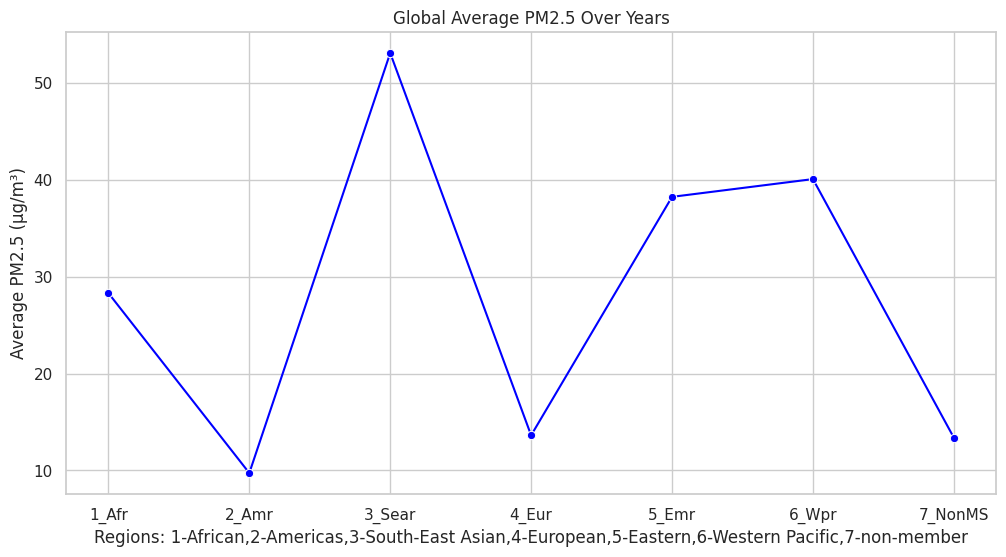

In [90]:
# Visualization

who_region_mean = df.groupby('who_region')['pm25_concentration'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=who_region_mean.index, y=who_region_mean.values, marker='o', color='blue')

plt.xlabel('Regions: 1-African,2-Americas,3-South-East Asian,4-European,5-Eastern,6-Western Pacific,7-non-member')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.title('Global Average PM2.5 Over Years')
plt.grid(True)
plt.show()

/tmp/ipython-input-4130701809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_count.index, y=year_count.values, palette="Blues_d")


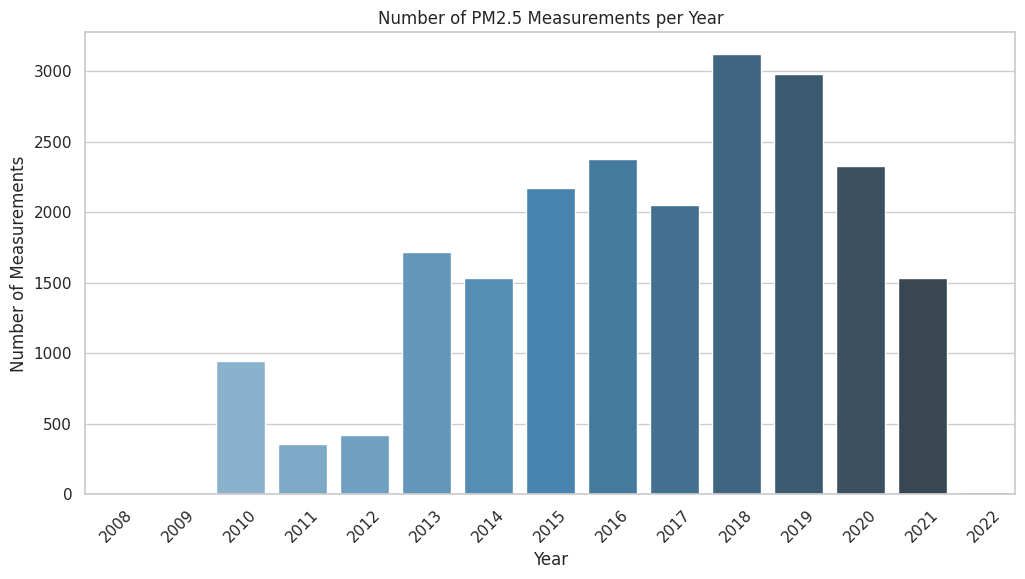

In [91]:
year_count = df.groupby('year')['pm25_concentration'].count()

plt.figure(figsize=(12,6))
sns.barplot(x=year_count.index, y=year_count.values, palette="Blues_d")
plt.xlabel('Year')
plt.ylabel('Number of Measurements')
plt.title('Number of PM2.5 Measurements per Year')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-265813055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='who_region', y='pm25_concentration', data=df, palette="Pastel1")


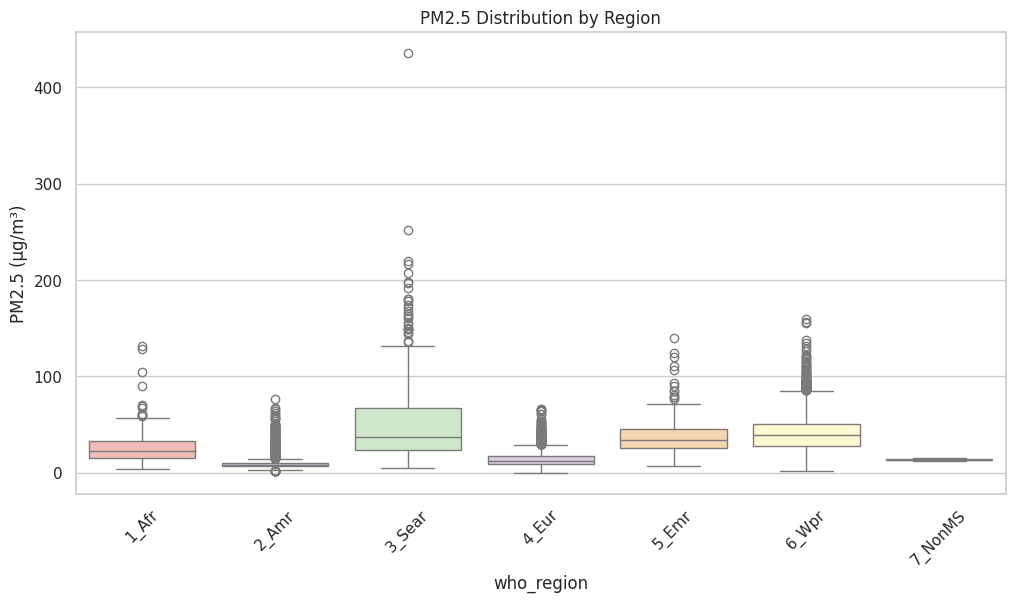

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot(x='who_region', y='pm25_concentration', data=df, palette="Pastel1")
plt.xticks(rotation=45)
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Distribution by Region')
plt.show()

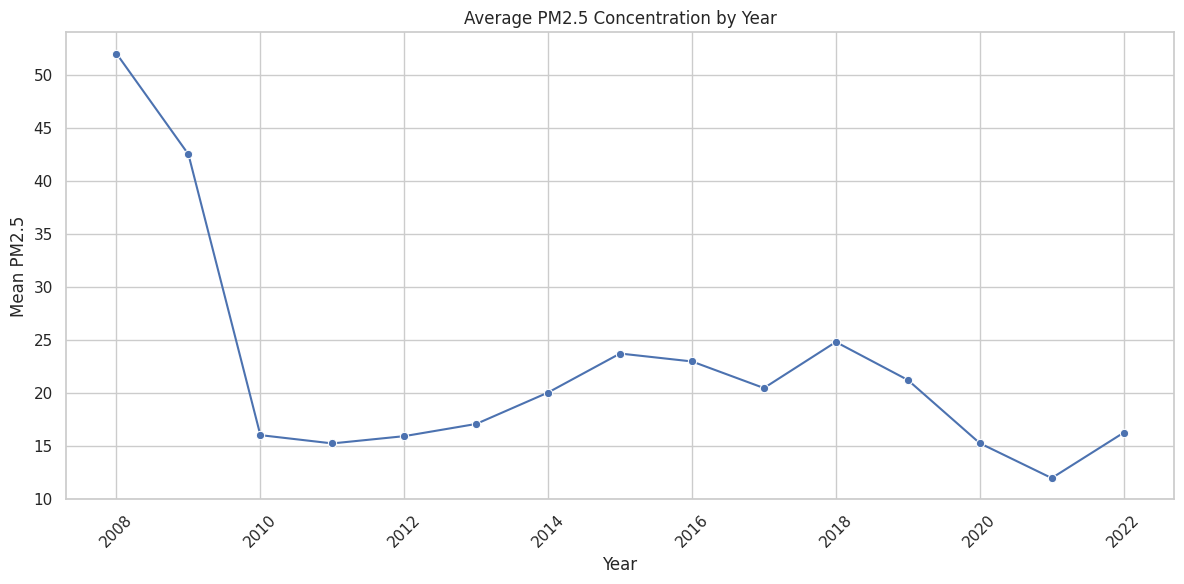

In [93]:
pm25_by_year = (
    df
    .groupby('year')['pm25_concentration']
    .mean()
    .reset_index()
)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=pm25_by_year, x='year', y='pm25_concentration', marker='o')
plt.title('Average PM2.5 Concentration by Year')
plt.xlabel('Year')
plt.ylabel('Mean PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

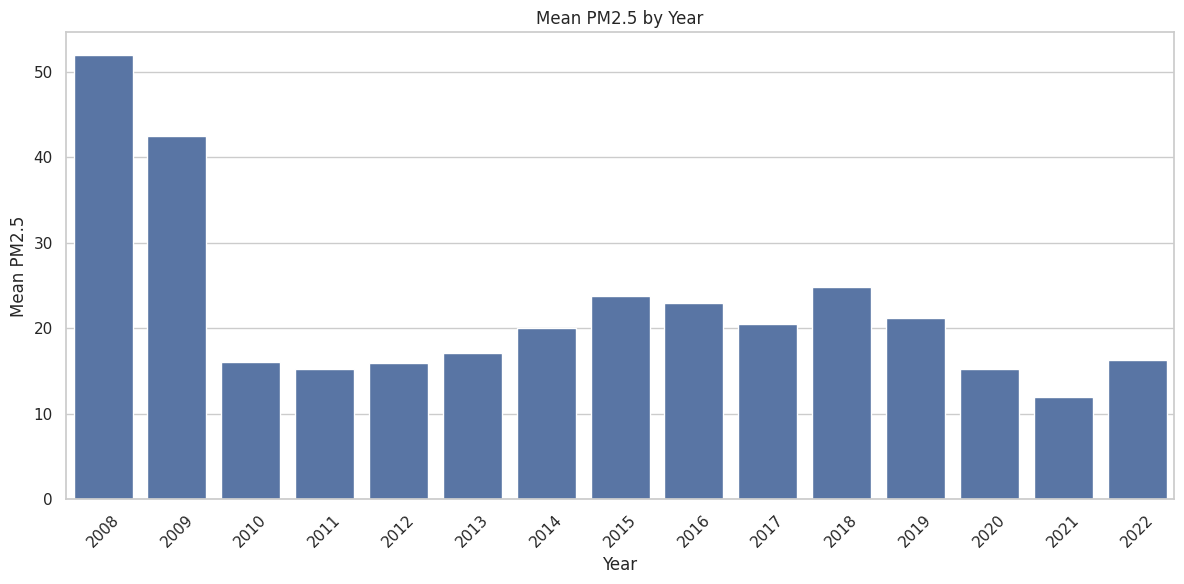

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(data=pm25_by_year, x='year', y='pm25_concentration')
plt.title('Mean PM2.5 by Year')
plt.xlabel('Year')
plt.ylabel('Mean PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

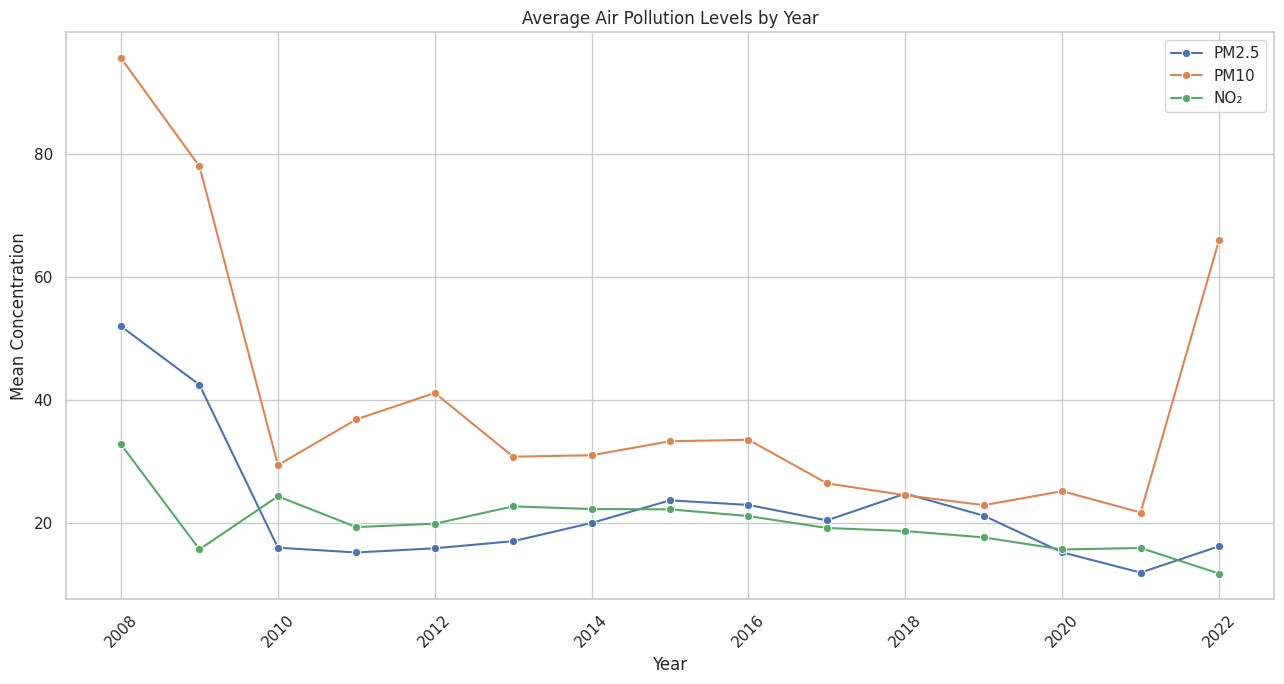

In [95]:
mean_by_year = (
    df
    .groupby('year')[['pm10_concentration', 'pm25_concentration', 'no2_concentration']]
    .mean()
    .reset_index()
)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,7))

sns.lineplot(data=mean_by_year, x='year', y='pm25_concentration', marker='o', label='PM2.5')
sns.lineplot(data=mean_by_year, x='year', y='pm10_concentration', marker='o', label='PM10')
sns.lineplot(data=mean_by_year, x='year', y='no2_concentration', marker='o', label='NO₂')

plt.title('Average Air Pollution Levels by Year')
plt.xlabel('Year')
plt.ylabel('Mean Concentration')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1782088719.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'who_region'])['pm25_concentration']


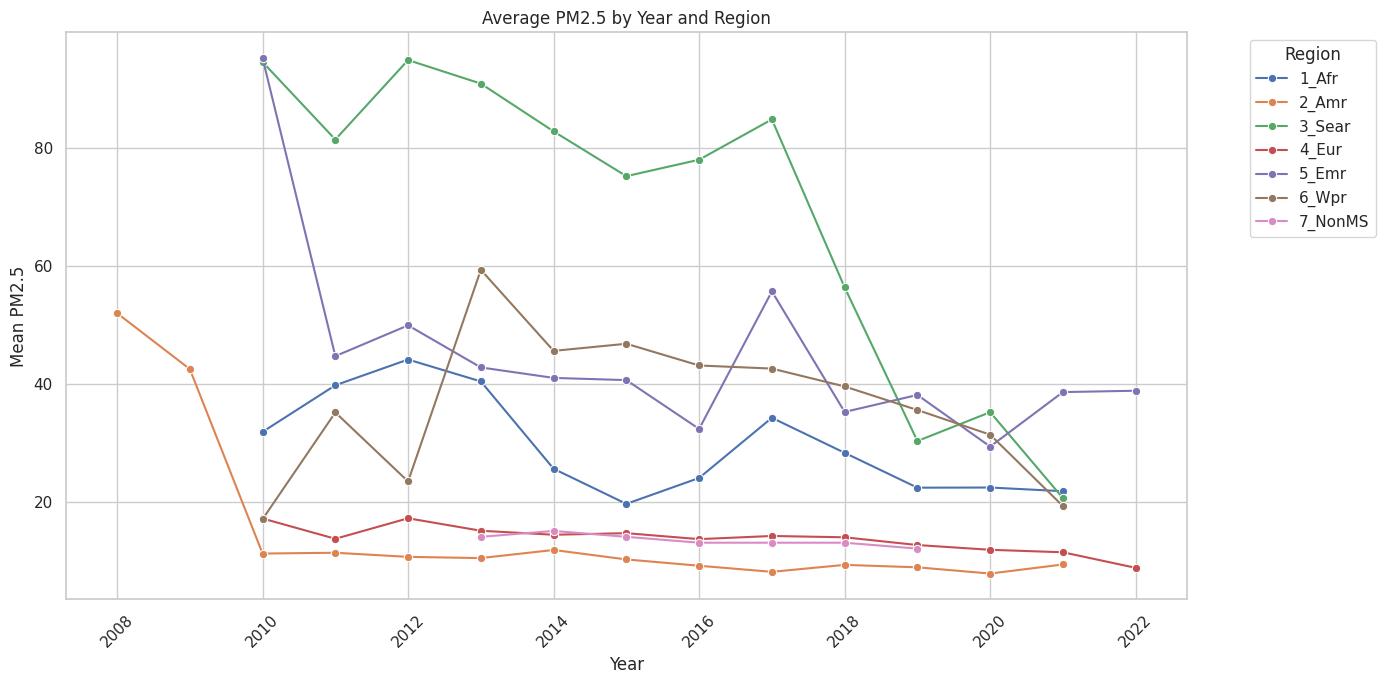

In [96]:
pm25_concentration_year_who_region = (
    df
    .dropna(subset=['pm25_concentration'])      # только для pm25
    .groupby(['year', 'who_region'])['pm25_concentration']
    .mean()
    .reset_index()
)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
sns.lineplot(
    data=pm25_concentration_year_who_region,
    x='year',
    y='pm25_concentration',
    hue='who_region',
    marker='o'
)

plt.title('Average PM2.5 by Year and Region')
plt.xlabel('Year')
plt.ylabel('Mean PM2.5')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2467038383.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'who_region'])['pm25_concentration']


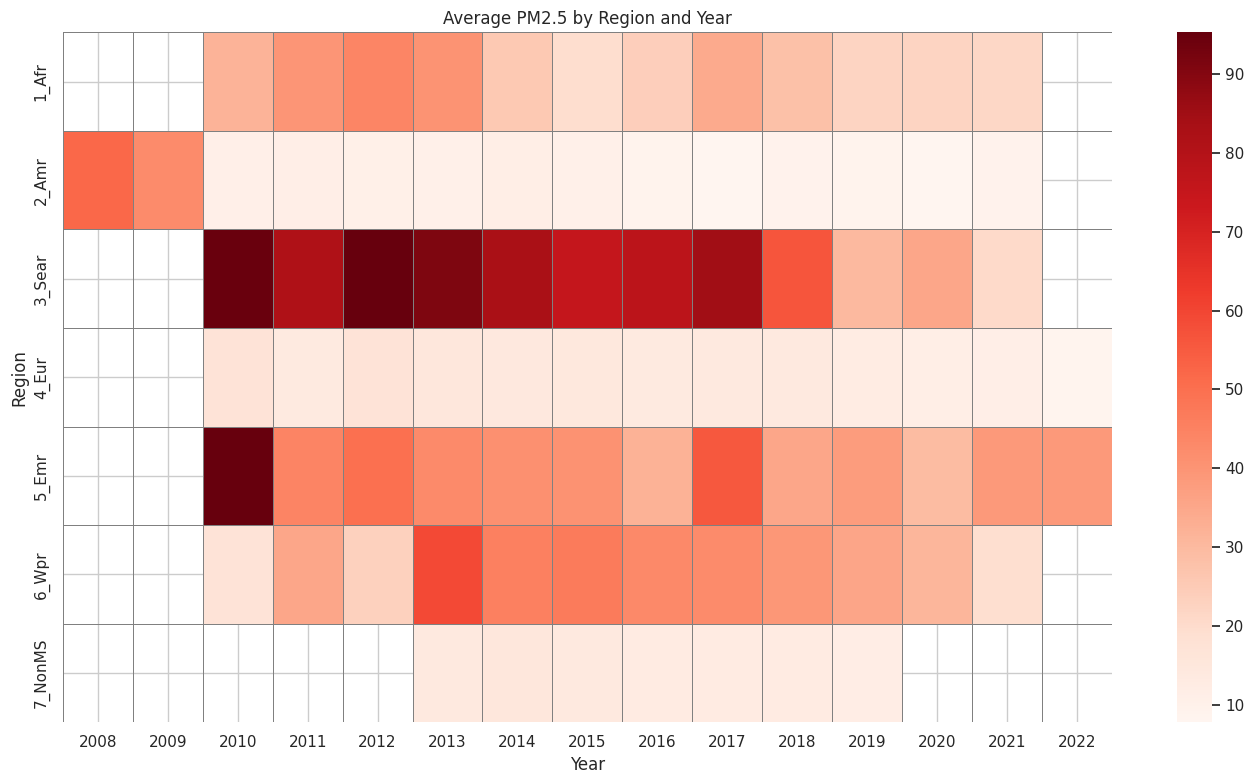

In [97]:
pm25_concentration_year_who_region = (
    df
    .dropna(subset=['pm25_concentration'])
    .groupby(['year', 'who_region'])['pm25_concentration']
    .mean()
    .reset_index()
)
pm25_pivot = pm25_concentration_year_who_region.pivot(
    index='who_region',
    columns='year',
    values='pm25_concentration'
)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.heatmap(
    pm25_pivot,
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Average PM2.5 by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [98]:
weighted_pm25 = (
    df
    .dropna(subset=['pm25_concentration', 'population'])
    .groupby(['year', 'who_region'])
    .apply(lambda x: (x['pm25_concentration'] * x['population']).sum() / x['population'].sum())
    .reset_index(name='weighted_pm25')
)
mean_pm25 = (
    df
    .dropna(subset=['pm25_concentration'])
    .groupby(['year', 'who_region'])['pm25_concentration']
    .mean()
    .reset_index(name='mean_pm25')
)

compare = mean_pm25.merge(
    weighted_pm25,
    on=['year', 'who_region'],
    how='inner'
)

/tmp/ipython-input-836443076.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'who_region'])
/tmp/ipython-input-836443076.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['pm25_concentration'] * x['population']).sum() / x['population'].sum())
/tmp/ipython-input-836443076.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

/tmp/ipython-input-3521527316.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('who_region')['pm25_concentration']


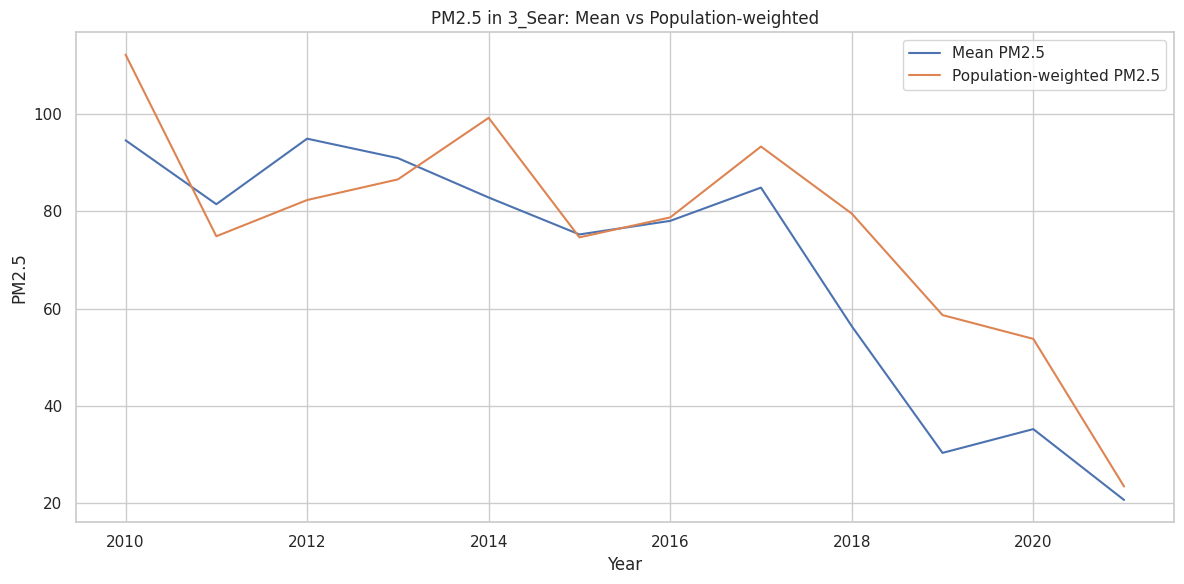

In [99]:
# Population-weighted PM2.5 provides a more realistic measure of human exposure,
# revealing differences between average pollution levels and actual population impact.
# Population-weighted PM2.5 reflects the average pollution exposure experienced
# by the population, giving more importance to areas where more people live.
top_regions = (
    df
    .dropna(subset=['pm25_concentration'])
    .groupby('who_region')['pm25_concentration']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top_regions
region_name = top_regions[0]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=compare[compare['who_region'] == region_name],
    x='year',
    y='mean_pm25',
    label='Mean PM2.5'
)

sns.lineplot(
    data=compare[compare['who_region'] == region_name],
    x='year',
    y='weighted_pm25',
    label='Population-weighted PM2.5'
)

plt.title(f'PM2.5 in {region_name}: Mean vs Population-weighted')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.legend()
plt.tight_layout()
plt.show()


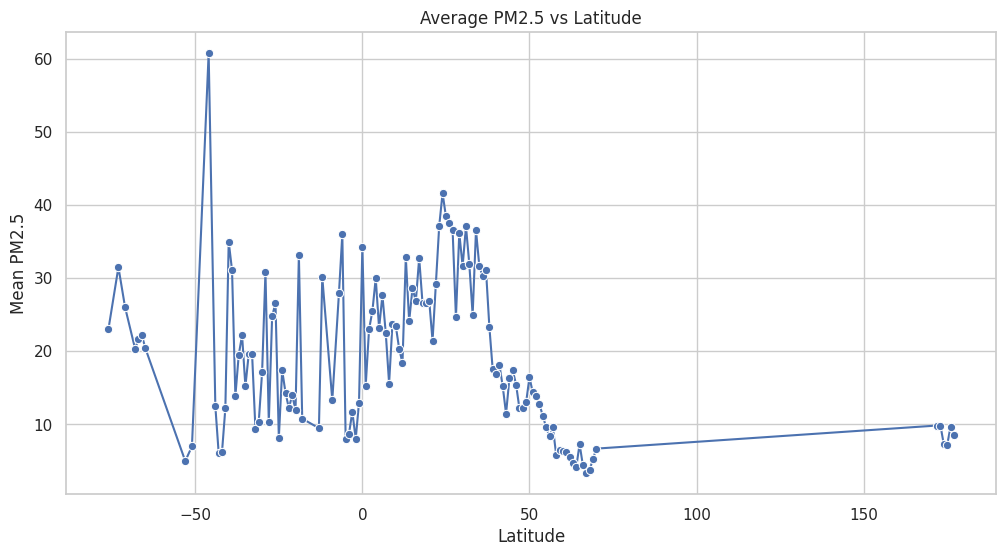

In [100]:
df['lat_round'] = df['latitude'].round()

pm25_lat = (
    df.dropna(subset=['pm25_concentration', 'latitude'])
      .groupby('lat_round')['pm25_concentration']
      .mean()
      .reset_index()
)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=pm25_lat, x='lat_round', y='pm25_concentration', marker='o')
plt.title('Average PM2.5 vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Mean PM2.5')
plt.grid(True)
plt.show()

/tmp/ipython-input-3496241885.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['pm25_concentration'] * x['population']).sum() / x['population'].sum())


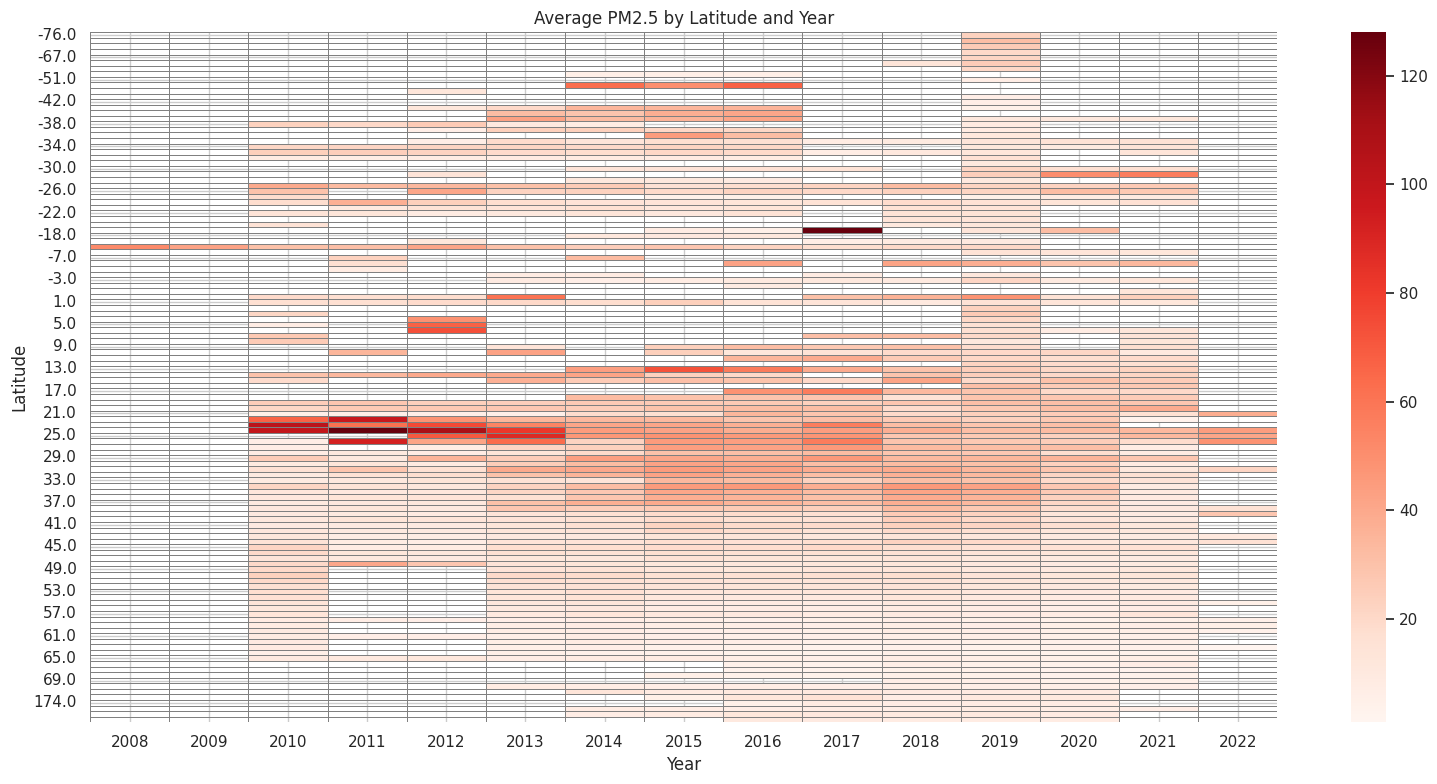

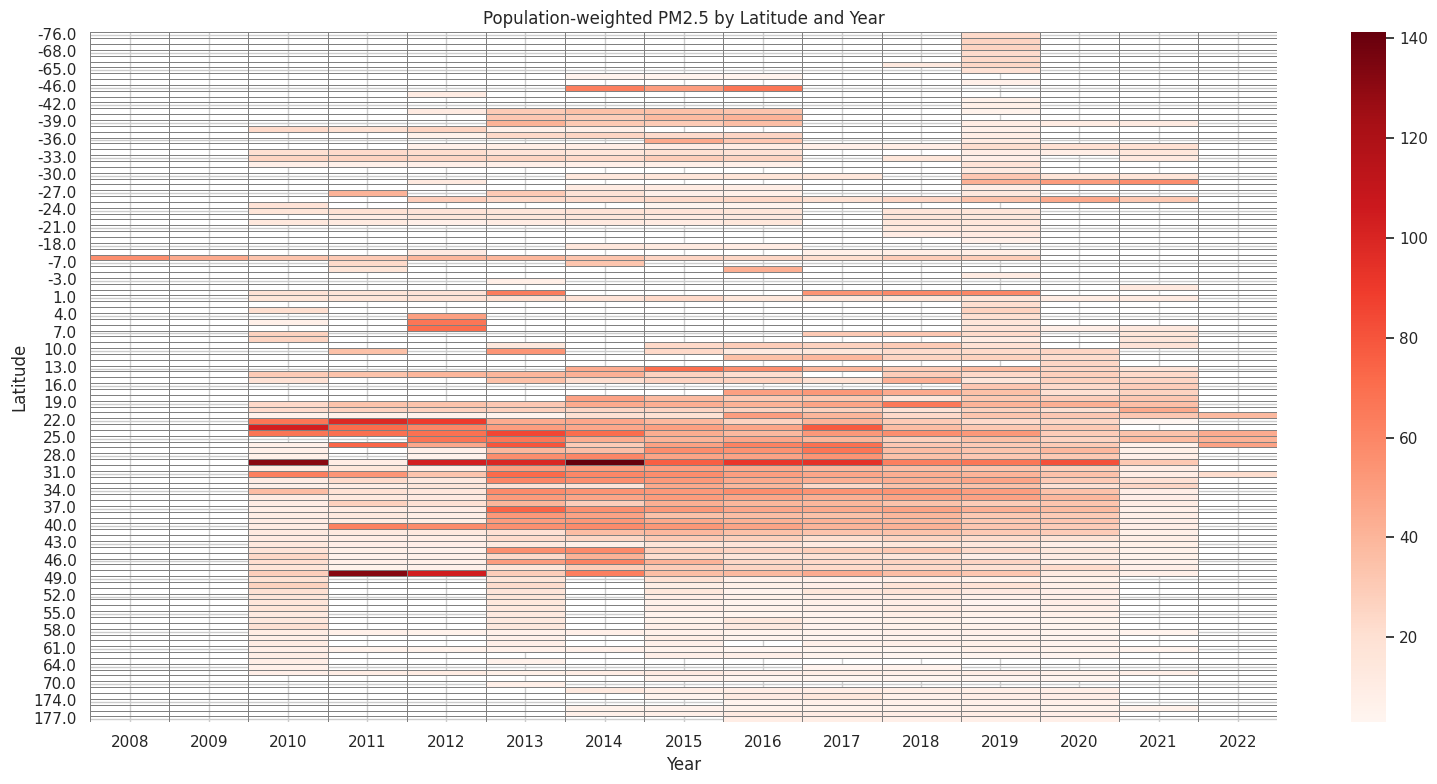

In [101]:
df['lat_round'] = df['latitude'].round()

# Mean PM2.5
pm25_concentration_lat_year = (
    df.dropna(subset=['pm25_concentration', 'latitude'])
      .groupby(['lat_round', 'year'])['pm25_concentration']
      .mean()
      .reset_index()
)
pm25_concentration_lat_year_weighted = (
    df.dropna(subset=['pm25_concentration', 'population', 'latitude'])
      .groupby(['lat_round', 'year'])
      .apply(lambda x: (x['pm25_concentration'] * x['population']).sum() / x['population'].sum())
      .reset_index(name='weighted_pm25_concentration')
)
# Unweighted/average mean
heatmap_mean = pm25_concentration_lat_year.pivot(index='lat_round', columns='year', values='pm25_concentration')

# Population-weighted
heatmap_weighted = pm25_concentration_lat_year_weighted.pivot(index='lat_round', columns='year', values='weighted_pm25_concentration')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_mean, cmap='Reds', linewidths=0.5, linecolor='gray')
plt.title('Average PM2.5 by Latitude and Year')
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_weighted, cmap='Reds', linewidths=0.5, linecolor='gray')
plt.title('Population-weighted PM2.5 by Latitude and Year')
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

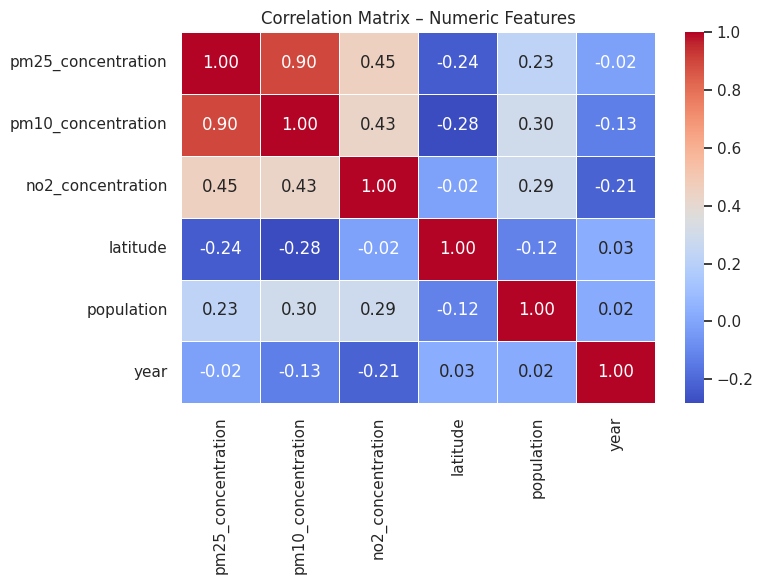

In [103]:
# The closer the value is to +1 or –1, the stronger the relationship between variables.
# Correlation values range from –1 to +1 and show how strongly two variables are related.
# (+1.0 → perfect positive correlation; 0.7 to 0.9 → strong positive correlation;
# 0.3 to 0.6 → moderate positive correlation).

numeric_cols = ['pm25_concentration', 'pm10_concentration', 'no2_concentration', 'latitude', 'population', 'year']
df_numeric = df[numeric_cols]
corr_matrix = df_numeric.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    cmap='coolwarm',   # color scale
    fmt='.2f',         # 2 decimal places
    linewidths=0.5
)

plt.title('Correlation Matrix – Numeric Features')
plt.tight_layout()
plt.show()


In [ ]:
# This project analyzed global air pollution using PM2.5 as the main indicator.
# The results showed clear differences in air quality across time and geographic
# regions, with similar overall trends observed for PM10 and NO₂. Population-weighted
# analysis highlighted that human exposure to pollution depends not only on
# concentration levels but also on where people live.